In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd

In [37]:
path = '/content/drive/MyDrive/csv data/pp2018.csv'

In [38]:
df = pd.read_csv(path, names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

In [39]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


In [40]:
df.shape

(1024432, 16)

*   We will filter the data to get all the transaction for a particular year and month ( say July 2018 for example).
*   We will only keep transactions of type "A" (Additions) in the data frame and get rid of Changes and Deletions.
*  And for the sake of simplicity we will also remove transactions for property type "O" (Other)
*   Focus only on Detached ("D"), Semi Detached ("S"), Flats ("F") and Terraced
("T") houses.

In [41]:
# Select only record type "A" and propertyy type not "O"
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']

#Select transactions for 2018
df = df[(df["Sale Date"].dt.year == 2018)]

In [42]:
df.shape

(959003, 16)

**Step - 1 : Obtain the trend of sales volume across months**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959003 entries, 0 to 1024431
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TID            959003 non-null  object        
 1   Price          959003 non-null  int64         
 2   Sale Date      959003 non-null  datetime64[ns]
 3   Postcode       958301 non-null  object        
 4   Property Type  959003 non-null  object        
 5   New Build      959003 non-null  object        
 6   Tenure         959003 non-null  object        
 7   PAON           959003 non-null  object        
 8   SAON           127930 non-null  object        
 9   Street         945361 non-null  object        
 10  Locality       359120 non-null  object        
 11  Town/City      959003 non-null  object        
 12  District       959001 non-null  object        
 13  County         959003 non-null  object        
 14  PPD Category   959003 non-null  object        
 15  Reco

In [44]:
# Create a variable month to denote the transaction month
# df['Month'] = df['Sale Date'].apply(lambda x: x.srfttime("%Y-%m-%d")[:7])
df['Month'] = df['Sale Date'].dt.to_period('M').astype(str)

In [45]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,2018-01
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,2018-01


In [46]:
monthly_sales_volume = df["Month"].value_counts()

In [47]:
type(monthly_sales_volume)

pandas.core.series.Series

In [48]:
monthly_sales_volume.sort_index(inplace=True)

In [49]:
monthly_sales_volume

,count
Month,
2018-01,65004
2018-02,66959
2018-03,78070
2018-04,67094
2018-05,76325
2018-06,90178
2018-07,83082
2018-08,95382
2018-09,77836


In [50]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [51]:
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
plt.rcParams['figure.figsize'] = (15,5)

In [53]:
print(type(monthly_sales_volume))
print(monthly_sales_volume.shape)

<class 'pandas.core.series.Series'>
(12,)


Text(0.5, 0, 'Month')

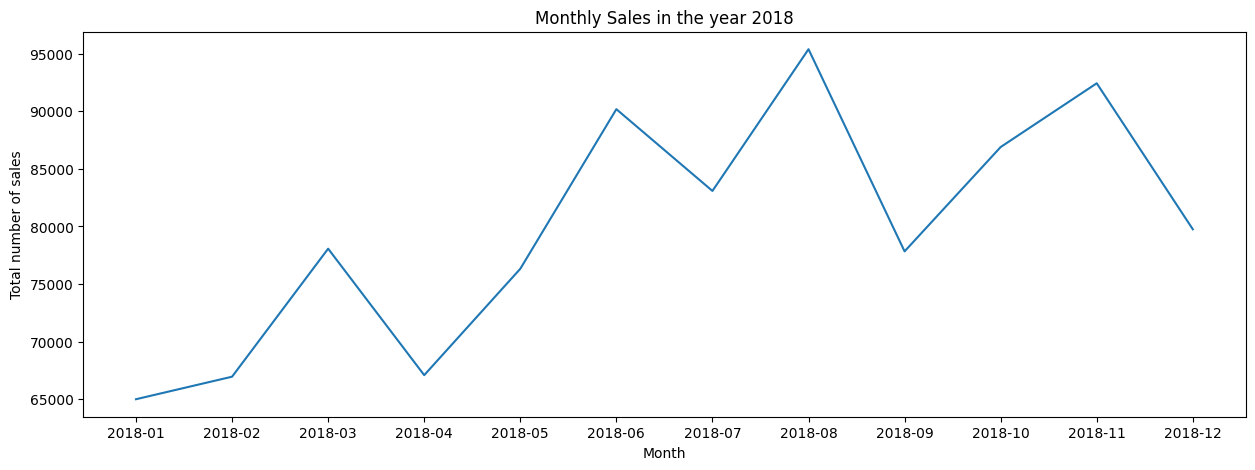

In [54]:
# Create the plot object
plt.plot(monthly_sales_volume)

plt.title('Monthly Sales in the year 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Month')

In [55]:
dist_data = df['District'].unique()

In [56]:
print(dist_data)

['SHROPSHIRE' 'WREKIN' 'TAUNTON DEANE' 'NORTH SOMERSET'
 'BATH AND NORTH EAST SOMERSET' 'SEDGEMOOR' 'SOUTH SOMERSET'
 'WEST SOMERSET' 'IPSWICH' 'SUFFOLK COASTAL' 'MID SUFFOLK' 'FOREST HEATH'
 'BABERGH' 'ST EDMUNDSBURY' 'WAVENEY' 'BROMLEY' 'CROYDON' 'BEXLEY'
 'SUTTON' 'MERTON' 'KINGSTON UPON THAMES' 'LAMBETH' 'RICHMOND UPON THAMES'
 'LEWISHAM' 'GREENWICH' 'WANDSWORTH' 'HAVANT' 'EAST HAMPSHIRE' 'MENDIP'
 'EPSOM AND EWELL' 'SURREY HEATH' 'ELMBRIDGE' 'TANDRIDGE'
 'REIGATE AND BANSTEAD' 'GUILDFORD' 'WOKING' 'WAVERLEY' 'RUNNYMEDE'
 'MOLE VALLEY' 'BARNSLEY' 'ROTHERHAM' 'SHEFFIELD' 'DONCASTER' 'STOCKPORT'
 'SALFORD' 'WIGAN' 'TAMESIDE' 'MANCHESTER' 'ROCHDALE' 'TRAFFORD' 'BOLTON'
 'OLDHAM' 'SWALE' 'CANTERBURY' 'TONBRIDGE AND MALLING' 'SHEPWAY' 'ASHFORD'
 'DOVER' 'MEDWAY' 'THANET' 'TUNBRIDGE WELLS' 'MAIDSTONE' 'BURY' 'PRESTON'
 'LIVERPOOL' 'HALTON' 'BLACKPOOL' 'BURNLEY' 'MID DEVON' 'EAST DEVON'
 'TORBAY' 'TEIGNBRIDGE' 'SPELTHORNE' 'BLACKBURN WITH DARWEN' 'FYLDE'
 'SOUTH RIBBLE' 'WEST LANCASHIRE' 

 Step - 2 : Observe the daily sales volume in the monthy of July 2018

In [57]:
# SD = df['Sale Date']
# print(SD)

In [58]:
df = df[df['Sale Date'].dt.month == 7]

print(df.shape)

daily_sales_volume = df["Sale Date"].value_counts()

(83082, 17)


In [59]:
daily_sales_volume

,count
Sale Date,
2018-07-27,11145
2018-07-20,8802
2018-07-06,8400
2018-07-13,6561
2018-07-31,5047
2018-07-12,3568
2018-07-30,3429
2018-07-26,2965
2018-07-02,2931


In [60]:
daily_sales_volume.sort_index(inplace=True)

In [61]:
daily_sales_volume

,count
Sale Date,
2018-07-01,18
2018-07-02,2931
2018-07-03,1828
2018-07-04,2064
2018-07-05,2358
2018-07-06,8400
2018-07-07,18
2018-07-08,11
2018-07-09,2259


Text(0.5, 0, 'Date')

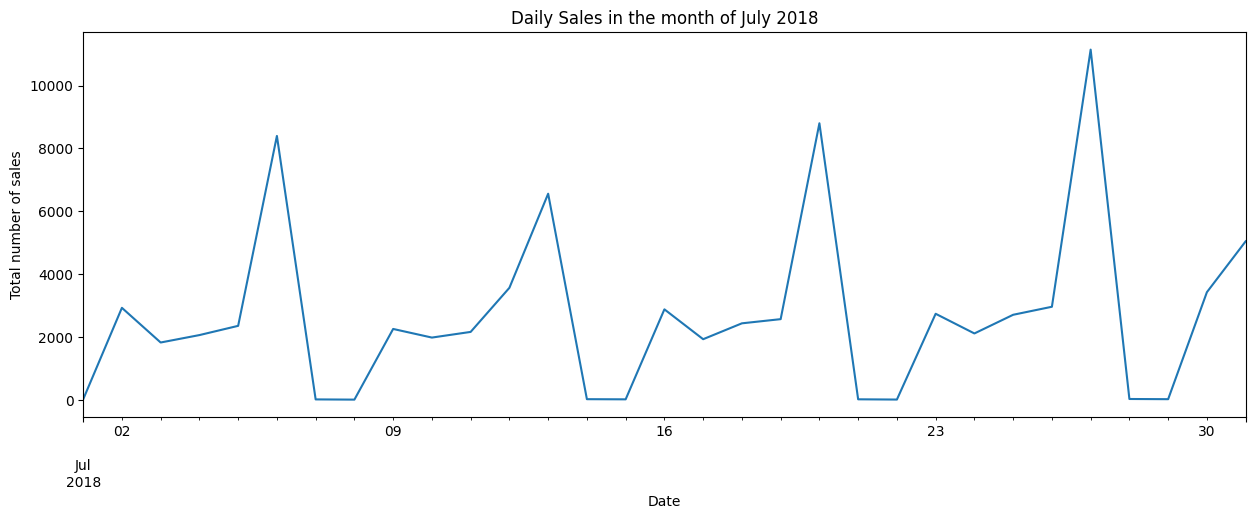

In [62]:
# Create the plot object
daily_sales_volume.plot()

plt.title('Daily Sales in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')

In [63]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month
835,{79A74E21-D135-1289-E053-6B04A8C01627},84000,2018-07-20,OL9 8LS,T,N,L,6,NaN,WHITEGATE LANE,CHADDERTON,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A,2018-07
1044,{773788C2-6D59-2CE4-E053-6C04A8C05E57},228000,2018-07-27,EX16 6AE,D,N,F,11,NaN,MERCERS CLOSE,NaN,TIVERTON,MID DEVON,DEVON,A,A,2018-07
1055,{773788C2-6D60-2CE4-E053-6C04A8C05E57},330000,2018-07-30,EX16 7BL,T,N,F,HOLLY TREE BARN,NaN,CHAINS ROAD,SAMPFORD PEVERELL,TIVERTON,MID DEVON,DEVON,A,A,2018-07
1123,{79A74E21-B602-1289-E053-6B04A8C01627},140000,2018-07-25,OL11 4DD,S,N,L,24,NaN,LINKS VIEW,NaN,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A,2018-07
1214,{79A74E21-BC74-1289-E053-6B04A8C01627},375000,2018-07-26,PR3 0ZL,D,N,F,THE COTTAGE,NaN,WEST END,GREAT ECCLESTON,PRESTON,WYRE,LANCASHIRE,A,A,2018-07


Step - 3: Comparing the daily sales volume of different property types in July

In [66]:
daily_price = df.groupby(['Sale Date','Property Type'])['Price'].count().unstack()

In [68]:
daily_price.columns

Index(['D', 'F', 'S', 'T'], dtype='object', name='Property Type')

In [67]:
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


Text(0.5, 0, 'Date')

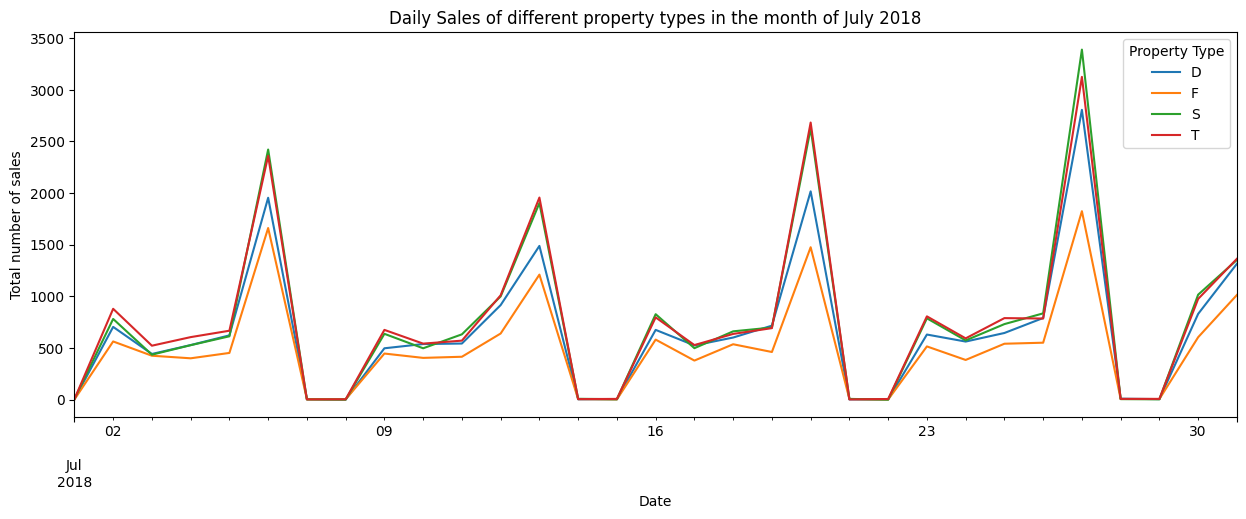

In [70]:
daily_price.plot()

plt.title('Daily Sales of different property types in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')

Step - 4: Draw coparison among different property types in term of sales

In [71]:
# Number of residental property transactions in Aug 2018 by property type
sales_by_type = df["Property Type"].value_counts()

In [72]:
sales_by_type

,count
Property Type,
T,23630
S,23501
D,20406
F,15545


Text(0.5, 0, 'Property Type')

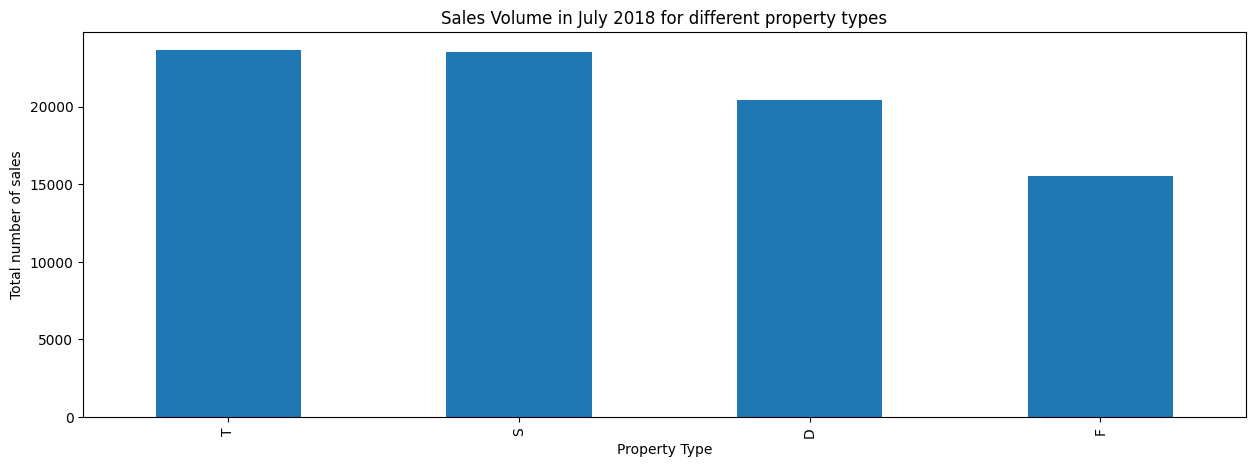

In [75]:
# Create the plot object
sales_by_type.plot(kind = 'bar')

plt.title('Sales Volume in July 2018 for different property types')
plt.ylabel('Total number of sales')
plt.xlabel('Property Type')

Step - 4: Average house prices for different property types in July

In [77]:
avg_price_property_type = df.groupby('Property Type')['Price'].mean()

In [78]:
avg_price_property_type

,Price
Property Type,
D,420870.312359
F,306578.147507
S,260353.586613
T,248855.367203


Text(0, 0.5, 'Average Prices')

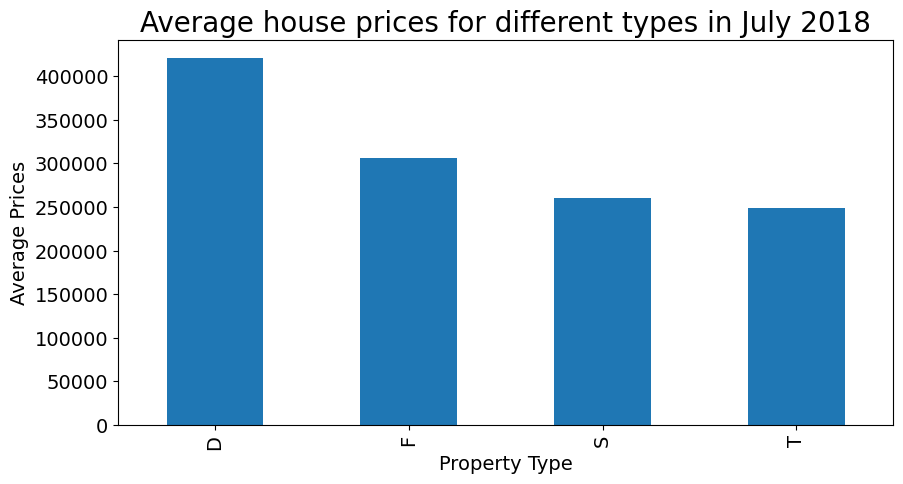

In [79]:
# Create the instance of a figure object
ax = avg_price_property_type.plot.bar(figsize = (10, 5), fontsize = 14)

ax.set_title("Average house prices for different types in July 2018", fontsize = 20)
ax.set_xlabel("Property Type", fontsize = 14)
ax.set_ylabel("Average Prices", fontsize = 14)
